The output width and height of a convolutional layer may differ from the input due to two reasons:

1. **Border Effects:**
   - Padding the input feature map can counter these effects.
   - Padding involves adding rows and columns around the input, allowing convolution windows to fit around every input tile.
   - There are two padding options: "valid" (no padding) and "same" (pad to maintain output dimensions as input).

2. **Strides:**
   - Stride is the distance between two successive windows during the convolution operation.
   - Stride defaults to 1, meaning windows move one step at a time.
   - A higher stride results in strided convolutions, where the width and height of the feature map are downsampled.
   - For instance, using a stride of 2 means downsampling the feature map by a factor of 2.

3. **Max-Pooling for Downsampling:**
   - To downsample feature maps, max-pooling is often used instead of strides.
   - Max-pooling involves selecting the maximum value from a group of values in the input.
   - It helps reduce the spatial dimensions of the feature map.


# Training Convnet by directly taking images from directory

In [46]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

 Using ImageDataGenerator to read images from directories

In [48]:

base_dir = "formal_and_informal_img/"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150), batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [51]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


When using fit_generator, you can pass a validation_data argument, much as
 with the fit method. It’s important to note that this argument is allowed to be a data
 generator, but it could also be a tuple of Numpy arrays. If you pass a generator as
 validation_data, then this generator is expected to yield batches of validation data
 endlessly; thus you should also specify the validation_steps argument, which tells
 the process how many batches to draw from the validation generator for evaluation

In [52]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10)

Epoch 1/30


C:\Users\rani\AppData\Local\Temp\ipykernel_10568\4082330117.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


50/50 [==============================] - 14s 257ms/step - loss: 0.7110 - acc: 0.5700 - val_loss: 0.6583 - val_acc: 0.6550
Epoch 2/30
50/50 [==============================] - 12s 243ms/step - loss: 0.6339 - acc: 0.6660 - val_loss: 0.6329 - val_acc: 0.6700
Epoch 3/30
50/50 [==============================] - 14s 268ms/step - loss: 0.6200 - acc: 0.6910 - val_loss: 0.7045 - val_acc: 0.6450
Epoch 4/30
50/50 [==============================] - 12s 249ms/step - loss: 0.5909 - acc: 0.6940 - val_loss: 0.6776 - val_acc: 0.6350
Epoch 5/30
50/50 [==============================] - 15s 300ms/step - loss: 0.5545 - acc: 0.7220 - val_loss: 0.6483 - val_acc: 0.6300
Epoch 6/30
50/50 [==============================] - 12s 236ms/step - loss: 0.5262 - acc: 0.7560 - val_loss: 0.6501 - val_acc: 0.6600
Epoch 7/30
50/50 [==============================] - 12s 240ms/step - loss: 0.5033 - acc: 0.7580 - val_loss: 0.6770 - val_acc: 0.6250
Epoch 8/30
50/50 [==============================] - 12s 242ms/step - loss: 0.462

In [53]:
model.save('formal_informal.h5')

C:\python3.9.7\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


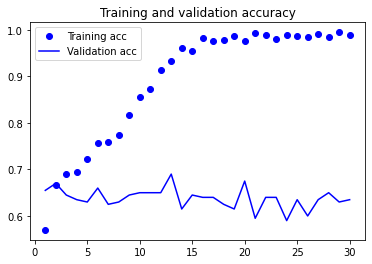

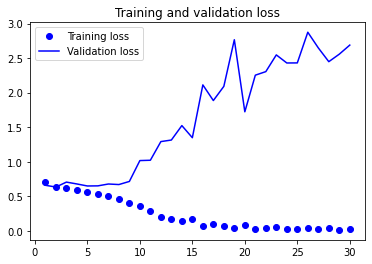

In [55]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

 # Data augmentation takes the approach of generating more training data
 from existing training samples, by augmenting the samples via a number of random
 transformations that yield believable-looking images. The goal is that at training time,
 your model will never see the exact same picture twice. This helps expose the model
 to more aspects of the data and generalize better.
    If you train a new network using this data-augmentation configuration, the network
 will never see the same input twice. But the inputs it sees are still heavily intercor
related, because they come from a small number of original images—you can’t pro
duce new information, you can only remix existing information. As such, this may not
 be enough to completely get rid of overfitting. To further fight overfitting, you’ll also
 add a Dropout layer to your model, right before the densely connected

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras import optimizers


datagen = ImageDataGenerator(
         rotation_range=40,
         width_shift_range=0.2,
         height_shift_range=0.2,
         shear_range=0.2,
         zoom_range=0.2,
         horizontal_flip=True,
         fill_mode='nearest')

C:\python3.9.7\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.2.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


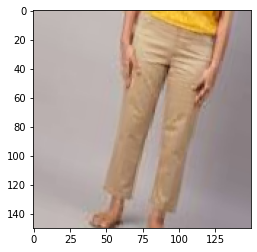

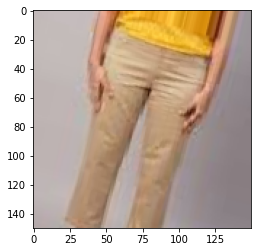

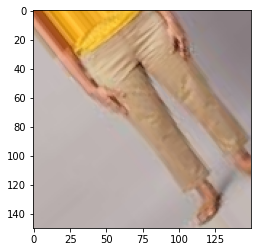

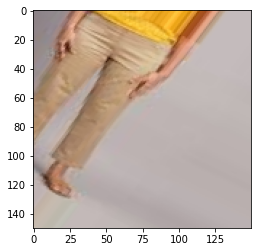

In [2]:
 
train_formal_dir = "formal_and_informal_img/train/formal/"

fnames = [os.path.join(train_formal_dir, fname) for fname in os.listdir(train_formal_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
         break
plt.show()

# Training with Data Augmentation 


In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras import optimizers

C:\python3.9.7\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.2.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
base_dir = "formal_and_informal_img/"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')


history = model.fit_generator(
train_generator,
steps_per_epoch=50,
epochs=100,
validation_data=validation_generator,
validation_steps=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


C:\Users\rani\AppData\Local\Temp\ipykernel_2144\2892725121.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100



50/50 [==============================] - 15s 281ms/step - loss: 0.7253 - acc: 0.4900 - val_loss: 0.6915 - val_acc: 0.6100
Epoch 2/100
50/50 [==============================] - 14s 281ms/step - loss: 0.6934 - acc: 0.5830 - val_loss: 0.6842 - val_acc: 0.5400
Epoch 3/100
50/50 [==============================] - 14s 280ms/step - loss: 0.6363 - acc: 0.6610 - val_loss: 0.6301 - val_acc: 0.6650
Epoch 4/100
50/50 [==============================] - 15s 297ms/step - loss: 0.6278 - acc: 0.6640 - val_loss: 0.6038 - val_acc: 0.7150
Epoch 5/100
50/50 [==============================] - 15s 290ms/step - loss: 0.6057 - acc: 0.6700 - val_loss: 0.6395 - val_acc: 0.6700
Epoch 6/100
50/50 [==============================] - 14s 269ms/step - loss: 0.5925 - acc: 0.6890 - val_loss: 0.6088 - val_acc: 0.7000
Epoch 7/100
50/50 [==============================] - 13s 266ms/step - loss: 0.5879 - acc: 0.6840 - val_loss: 0.5940 - val_acc: 0.6600
Epoch 8/100
50/50 [==============================] - 13s 265ms/step - loss

Epoch 62/100
50/50 [==============================] - 13s 265ms/step - loss: 0.4959 - acc: 0.7550 - val_loss: 0.5906 - val_acc: 0.7350
Epoch 63/100
50/50 [==============================] - 13s 266ms/step - loss: 0.5100 - acc: 0.7500 - val_loss: 0.5677 - val_acc: 0.6950
Epoch 64/100
50/50 [==============================] - 13s 265ms/step - loss: 0.5233 - acc: 0.7360 - val_loss: 0.6891 - val_acc: 0.6950
Epoch 65/100
50/50 [==============================] - 13s 264ms/step - loss: 0.5028 - acc: 0.7540 - val_loss: 0.7184 - val_acc: 0.6700
Epoch 66/100
50/50 [==============================] - 13s 264ms/step - loss: 0.5382 - acc: 0.7370 - val_loss: 0.5210 - val_acc: 0.7050
Epoch 67/100
50/50 [==============================] - 13s 266ms/step - loss: 0.4954 - acc: 0.7640 - val_loss: 0.5667 - val_acc: 0.6850
Epoch 68/100
50/50 [==============================] - 13s 265ms/step - loss: 0.5104 - acc: 0.7560 - val_loss: 0.5466 - val_acc: 0.7250
Epoch 69/100
50/50 [==============================] - 1

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']

In [6]:
model.save('formal_informal_dress_cnn_withaugmentation.h5')

C:\python3.9.7\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


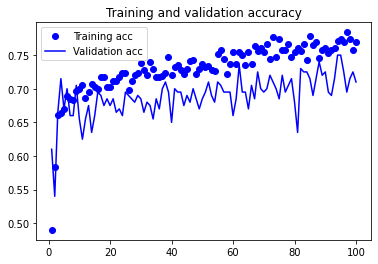

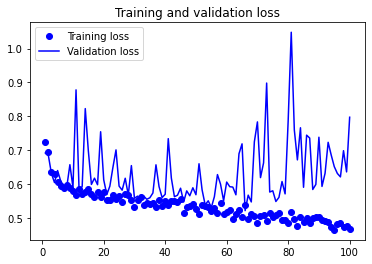

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

/
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# CNN with Data Augmentation : 
training accuracy 0.7690 val_acc: 0.7100

In [11]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 200 images belonging to 2 classes.


C:\Users\rani\AppData\Local\Temp\ipykernel_2144\4165470040.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.6850000023841858
